First importing modules

In [1]:
from glycowork.motif.draw import GlycoDraw
from glycowork.motif.processing import canonicalize_iupac
from glycowork.motif.draw import plot_glycans_excel
from glycowork.motif.analysis import get_heatmap
from glycowork.motif.draw import annotate_figure
from glycowork.motif.analysis import get_differential_expression
from glycowork.motif.analysis import get_pca
from glycowork.motif.analysis import get_volcano
from glycowork.network.biosynthesis import *
import pandas as pd # For wrangling data
import os # For renaming files

In [2]:
pwd()

'C:\\lmpc-infection-rnaseq'

Loading input data

In [3]:
df_canonicalized_mouse_all = pd.read_csv(".\\Python_input_files\\df_canonicalized_mouse_all.tsv", sep='\t', dtype={'Glycan_ID': str})
df_canonicalized_mouse_minimal_glycan_col_all = pd.read_csv(".\\Python_input_files\\df_canonicalized_mouse_minimal_glycan_col_all.tsv", sep='\t')
df_canonicalized_mouse_minimal_glycan_col_all.set_index(df_canonicalized_mouse_minimal_glycan_col_all.columns[0], inplace=True)
df_canonicalized_mouse_minimal_sample_col_all = pd.read_csv(".\\Python_input_files\\df_canonicalized_mouse_minimal_sample_col_all.tsv", sep='\t')
#df_canonicalized_mouse_minimal_sample_col_all.set_index(df_canonicalized_mouse_minimal_sample_col_all.columns[0], inplace=True)
mouse_sample_metadata_all = pd.read_csv(".\\Python_input_files\\mouse_sample_metadata_all.tsv", sep='\t')
#mouse_infected_vehicle_sample_names = pd.read_csv(".\\Python_input_files\\mouse_infected_vehicle_sample_names.tsv", sep='\t')
#mouse_infected_vehicle_sample_names = mouse_infected_vehicle_sample_names.iloc[:, 0].tolist()
#mouse_uninfected_vehicle_sample_names = pd.read_csv(".\\Python_input_files\\mouse_uninfected_vehicle_sample_names.tsv", sep='\t')
#mouse_uninfected_vehicle_sample_names = mouse_uninfected_vehicle_sample_names.iloc[:, 0].tolist()

In [4]:
# Lists of group ids
group_sham_infected_ids = mouse_sample_metadata_all[mouse_sample_metadata_all['Group'] == 'ShamInfected']['id'].tolist()
group_hpylori_infected_ids = mouse_sample_metadata_all[mouse_sample_metadata_all['Group'] == 'HpyloriInfected']['id'].tolist()
cohort_h07_ids = mouse_sample_metadata_all[mouse_sample_metadata_all['Cohort'] == 'H07']['id'].tolist()
cohort_h10_ids = mouse_sample_metadata_all[mouse_sample_metadata_all['Cohort'] == 'H10']['id'].tolist()

Drawing SNFG figures

In [8]:
# Function to apply GlycoDraw to each mouse glycan structure string and save the resulting file as pdf
def draw_glycan_mouse(row):
    structure = row['Canonicalized_Structure']
    glycan_id = row['Glycan_ID']
    # Define the output file path
    output_file = f".\\Python_output_files\\Glycan_SNFG\\{glycan_id}_{structure}.pdf"
    # Draw the glycan structure
    GlycoDraw(structure, filepath=output_file)

In [5]:
# Apply the function to each row in the DataFrame for mouse glycans
# All samples
df_canonicalized_mouse_all.apply(draw_glycan_mouse, axis=1)

0     None
1     None
2     None
3     None
4     None
      ... 
95    None
96    None
97    None
98    None
99    None
Length: 100, dtype: object

In [19]:
# Mouse glycans excel with SNFG column
# All samples
plot_glycans_excel(df = df_canonicalized_mouse_all,
                  folder_filepath = ".\\Python_output_files\\Tables",
                  glycan_col_num = 2)

In [21]:
# Rename file to something more logical
os.rename(".\\Python_output_files\\Tables\\output.xlsx", ".\\Python_output_files\\Tables\\Glycan_SNFG_Table.xlsx")

Glycan exploration, for example heatmaps and PCA

In [9]:
print(df_canonicalized_mouse_minimal_sample_col_all)

                                               glycan     H0701     H0702  \
0                                     Gal(b1-3)GalNAc  0.242959  0.208267   
1                                   GalOS(b1-3)GalNAc  0.007172  0.012267   
2                          Gal(b1-3)[Fuc(a1-?)]GalNAc  0.140820  0.183320   
3                            Fuc(a1-2)Gal(b1-3)GalNAc  1.811925  1.782675   
4                       Fuc(a1-?)[HexNAc(?1-?)]GalNAc  0.098392  0.079560   
..                                                ...       ...       ...   
95  Neu5Ac(a2-?)Gal(?1-?)GlcNAc(b1-3)Gal(b1-4)GlcN...  0.137300  0.125417   
96  Neu5Ac(a2-?)HexNAc(?1-?)GlcNAc(b1-2)Man(a1-3)[...  0.510790  0.000000   
97  Neu5Ac(a2-?)Gal(?1-?)GlcNAc(b1-2)Man(a1-3)[Neu...  0.005985  0.019840   
98  Neu5Ac(a2-?)Gal(?1-?)GlcNAc(b1-3)Gal(?1-?)GlcN...  0.218813  0.000000   
99  Fuc(a1-2)Gal(?1-?)GlcNAc(b1-3)Gal(?1-?)GlcNAc(...  0.005644  0.024738   

       H0703     H0704     H0706     H0708     H0709     H0710     H1001  \

In [5]:
print(mouse_sample_metadata_all)

       id            Group Cohort
0   H0701     ShamInfected    H07
1   H0702     ShamInfected    H07
2   H0703     ShamInfected    H07
3   H0704     ShamInfected    H07
4   H0706  HpyloriInfected    H07
5   H0708  HpyloriInfected    H07
6   H0709  HpyloriInfected    H07
7   H0710  HpyloriInfected    H07
8   H1001     ShamInfected    H10
9   H1002     ShamInfected    H10
10  H1003     ShamInfected    H10
11  H1004     ShamInfected    H10
12  H1007  HpyloriInfected    H10
13  H1008  HpyloriInfected    H10
14  H1009  HpyloriInfected    H10
15  H1010  HpyloriInfected    H10


In [6]:
group_list = mouse_sample_metadata_all['Group'].tolist()

In [7]:
print(group_list)

['ShamInfected', 'ShamInfected', 'ShamInfected', 'ShamInfected', 'HpyloriInfected', 'HpyloriInfected', 'HpyloriInfected', 'HpyloriInfected', 'ShamInfected', 'ShamInfected', 'ShamInfected', 'ShamInfected', 'HpyloriInfected', 'HpyloriInfected', 'HpyloriInfected', 'HpyloriInfected']


In [8]:
cohort_list = mouse_sample_metadata_all['Cohort'].tolist()

In [9]:
print(cohort_list)

['H07', 'H07', 'H07', 'H07', 'H07', 'H07', 'H07', 'H07', 'H10', 'H10', 'H10', 'H10', 'H10', 'H10', 'H10', 'H10']


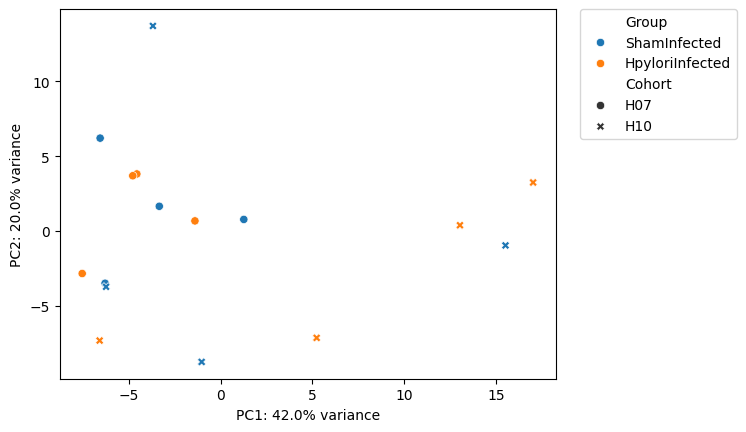

In [10]:
## Mouse PCA
# With groups and cohorts
get_pca(df = df_canonicalized_mouse_minimal_sample_col_all,
       motifs = True,
        groups = mouse_sample_metadata_all,
        color = 'Group',
        shape = 'Cohort',
       feature_set = ['terminal1',
                      'terminal2',
                      'terminal3'],
       filepath = '.\\Python_output_files\\Figures\\PCA_Glycans_Groups_And_Cohorts.pdf')

In [11]:
# Prepare annotation to be passed to seaborn.
df_heatmap_annotation = mouse_sample_metadata_all.set_index('id')

In [12]:
group_to_color = {
    'ShamInfected': '#4DC36B', # Green
    'HpyloriInfected': '#440C55', # Purple
}

cohort_to_color = {
    'H07': '#E85311', # Orange
    'H10': '#15B8E9', # Blue
}

In [13]:
col_colors = pd.DataFrame({
    'Group': df_heatmap_annotation['Group'].map(group_to_color),
    'Cohort': df_heatmap_annotation['Cohort'].map(cohort_to_color)
})

In [14]:
kwargs = {
    'col_colors': col_colors
}

In [15]:
# Perform Heatmap
# svg
get_heatmap(df_canonicalized_mouse_minimal_glycan_col_all, 
            motifs=True, 
            feature_set=['terminal1',
                         'terminal2',
                         'terminal3'], 
            transform='', 
            datatype='response', 
            rarity_filter=0.05, 
            filepath='.\\Python_output_files\\Figures\\Heatmap_Glycans.svg', 
            return_plot=False,
            yticklabels = 1,
            xticklabels = 1,
            figsize=(8,11),
            **kwargs)

# pdf
get_heatmap(df_canonicalized_mouse_minimal_glycan_col_all, 
            motifs=True, 
            feature_set=['terminal1',
                         'terminal2',
                         'terminal3'], 
            transform='', 
            datatype='response', 
            rarity_filter=0.05, 
            filepath='.\\Python_output_files\\Figures\\Heatmap_Glycans.pdf', 
            return_plot=False,
            yticklabels = 1,
            xticklabels = 1,
            figsize=(8,11),
            **kwargs)

In [16]:
# Annotate heatmap with SNFG figures
annotate_figure(svg_input = ".\\Python_output_files\\Figures\\Heatmap_Glycans.svg",
                glycan_size = 'small',
                filepath = ".\\Python_output_files\\Figures\\Heatmap_Glycans_Annotated.pdf",
                compact = False)

In [17]:
# Differential glycomics on motif level
# Treatment comparison
differential_glycomics_treatment_df = get_differential_expression(df = df_canonicalized_mouse_minimal_sample_col_all,
                                                                     group1 = group_sham_infected_ids,
                                                                     group2 = group_hpylori_infected_ids,
                                                                     motifs = True,
                                                                     feature_set = ['terminal1', 
                                                                                    'terminal2',
                                                                                    'terminal3'],
                                                                     paired = False,
                                                                     min_samples = 0.1)
print(differential_glycomics_treatment_df)

You're working with an alpha of 0.05835541289349022 that has been adjusted for your sample size of 16.
                                    Glycan  Mean abundance    Log2FC  \
0     Terminal_GlcNAc(b1-4)Man(b1-4)GlcNAc        0.016670  1.873845   
71                   Terminal_Neu5Ac(a2-?)        1.201319  0.213230   
21                Terminal_Fuc(a1-6)GlcNAc        0.067854  0.357622   
36    Terminal_GalNAc(a1-3)Gal(b1-3)GlcNAc        0.144995 -0.374107   
43    Terminal_GalNAc(a1-?)Gal(b1-?)GlcNAc        0.199412 -0.323147   
..                                     ...             ...       ...   
69          Terminal_HexNAc(?1-?)Gal(b1-?)        1.076925 -0.019008   
28       Terminal_Gal(a1-3)Gal(b1-4)GlcNAc        0.088184 -0.018592   
38             Terminal_Gal(a1-?)Gal(b1-?)        0.167547  0.017846   
2   Terminal_Gal(b1-3)[Neu5Gc(a2-6)]GalNAc        0.003669  0.001634   
18       Terminal_Gal(?1-?)GlcNAc(b1-?)Man        0.043450 -0.000462   

       p-val  corr p-val  signif

In [18]:
# Differential glycomics on motif level
# Cohort
differential_glycomics_cohort_df = get_differential_expression(df = df_canonicalized_mouse_minimal_sample_col_all,
                                                                     group1 = cohort_h07_ids,
                                                                     group2 = cohort_h10_ids,
                                                                     motifs = True,
                                                                     feature_set = ['terminal1', 
                                                                                    'terminal2',
                                                                                    'terminal3'],
                                                                     paired = False,
                                                                     min_samples = 0.1)
print(differential_glycomics_cohort_df)

You're working with an alpha of 0.05835541289349022 that has been adjusted for your sample size of 16.
                                    Glycan  Mean abundance    Log2FC  \
90             Terminal_Fuc(a1-2)Gal(b1-3)        2.446454 -0.486780   
3     Terminal_Fuc(a1-3)GlcNAc(b1-6)GalNAc        0.006225 -0.479623   
18       Terminal_Gal(?1-?)GlcNAc(b1-?)Man        0.043623 -0.667775   
93             Terminal_Fuc(a1-?)Gal(b1-?)       10.576239 -0.551967   
89       Terminal_Fuc(a1-2)Gal(b1-3)GalNAc        2.277175 -0.432199   
..                                     ...             ...       ...   
16  Terminal_Neu5Ac(a2-3)[GalNAc(b1-4)]Gal        0.041207 -0.087557   
63    Terminal_GlcNAc(a1-?)Gal(?1-?)GlcNAc        0.931046 -0.097459   
0     Terminal_GlcNAc(b1-4)Man(b1-4)GlcNAc        0.013615  0.265519   
69                   Terminal_Neu5Ac(a2-?)        1.179694 -0.016598   
2   Terminal_Gal(b1-3)[Neu5Gc(a2-6)]GalNAc        0.003684  0.031702   

       p-val  corr p-val  signif

In [22]:
# Save differential glycomics result in SNFG annotated excel
plot_glycans_excel(df = differential_glycomics_treatment_df,
                  folder_filepath = ".\\Python_output_files\\Tables",
                  glycan_col_num = 0)

In [23]:
os.rename(".\\Python_output_files\\Tables\\output.xlsx", ".\\Python_output_files\\Tables\\differential_glycomics_treatment_df.xlsx")

In [24]:
plot_glycans_excel(df = differential_glycomics_cohort_df,
                  folder_filepath = ".\\Python_output_files\\Tables",
                  glycan_col_num = 0)

In [25]:
os.rename(".\\Python_output_files\\Tables\\output.xlsx", ".\\Python_output_files\\Tables\\differential_glycomics_cohort_df.xlsx")

In [19]:
# Write differential glycomics result to excel
differential_glycomics_treatment_df.to_excel('.\\Python_output_files\\Tables\\differential_glycomics_treatment.xlsx', index=False)
differential_glycomics_cohort_df.to_excel('.\\Python_output_files\\Tables\\differential_glycomics_cohort.xlsx', index=False)
# Annotate differential glycomics result with SNFG
plot_glycans_excel(df = differential_glycomics_treatment_df,
                  folder_filepath = ".\\Python_output_files\\Tables",
                  glycan_col_num = 2)
os.rename(".\\Python_output_files\\Tables\\output.xlsx", ".\\Python_output_files\\Tables\\Glycan_SNFG_Table.xlsx")

You're working with a default alpha of 0.05. Set sample size (n = ...) for Bayesian-Adaptive Alpha Adjustment


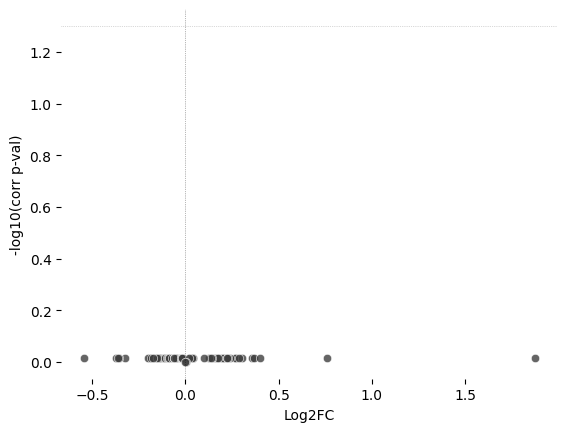

You're working with a default alpha of 0.05. Set sample size (n = ...) for Bayesian-Adaptive Alpha Adjustment


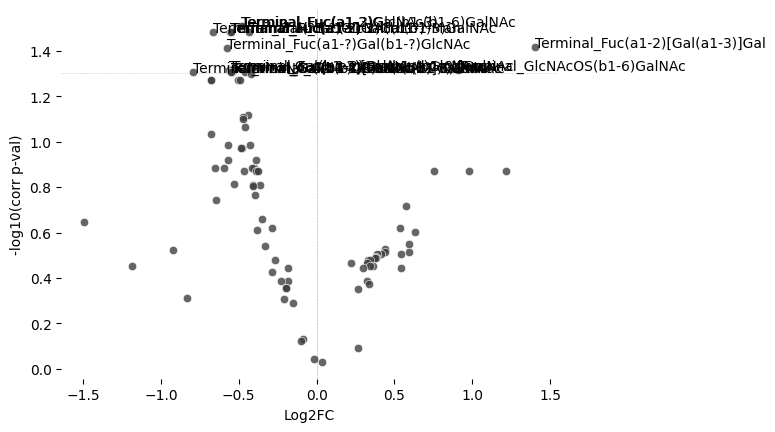

In [20]:
# Differential glycomics volcano plot
get_volcano(differential_glycomics_treatment_df,
           annotate_volcano = True,
           filepath = '.\\Python_output_files\\Figures\\differential_glycomics_treatment_volcano.svg')
# Differential glycomics volcano plot
get_volcano(differential_glycomics_cohort_df,
           annotate_volcano = True,
           filepath = '.\\Python_output_files\\Figures\\differential_glycomics_cohort_volcano.svg')

In [30]:
annotate_figure(svg_input = ".\\Python_output_files\\Figures\\differential_glycomics_treatment_volcano.svg",
                glycan_size = 'small',
                filepath = ".\\Python_output_files\\Figures\\differential_glycomics_treatment_volcano_Annotated.pdf",
                compact = False)

annotate_figure(svg_input = ".\\Python_output_files\\Figures\\differential_glycomics_cohort_volcano.svg",
                glycan_size = 'small',
                filepath = ".\\Python_output_files\\Figures\\differential_glycomics_cohort_volcano_Annotated.pdf",
                compact = False)